In [1]:
# 导入numpy库
import numpy as np

In [7]:
#解析文本数据函数
#@filename 文件名txt
#@delim 每一行不同特征数据之间的分隔方式，默认是tab键'\t'
def loadDataSet(filename,delim='\t'):
    #打开文本文件
    fr=open(filename)
    #对文本中每一行的特征分隔开来，存入列表中，作为列表的某一行
    #行中的每一列对应各个分隔开的特征
    stringArr=[line.strip().split(delim) for line in fr.readlines()]
    #利用map()函数，将列表中每一行的数据值映射为float型
    datArr=[list(map(float, line))for line in stringArr]
    #将float型数据值的列表转化为矩阵返回
    return np.mat(datArr)

In [10]:
#pca特征维度压缩函数
#@dataMat 数据集矩阵
#@topNfeat 需要保留的特征维度，即要压缩成的维度数，默认4096    
def pca(dataMat,topNfeat=4096):
    #求数据矩阵每一列的均值
    print(dataMat)
    meanVals=np.mean(dataMat,axis=0)
    #数据矩阵每一列特征减去该列的特征均值
    meanRemoved=dataMat-meanVals
    #计算协方差矩阵，除数n-1是为了得到协方差的无偏估计
    #cov(X,0) = cov(X) 除数是n-1(n为样本个数)
    #cov(X,1) 除数是n
    covMat=np.cov(meanRemoved,rowvar=0)
    #计算协方差矩阵的特征值及对应的特征向量
    #均保存在相应的矩阵中
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))
    #sort():对特征值矩阵排序(由小到大)
    #argsort():对特征值矩阵进行由小到大排序，返回对应排序后的索引
    eigValInd=np.argsort(eigVals)
    #从排序后的矩阵最后一个开始自下而上选取最大的N个特征值，返回其对应的索引
    eigValInd=eigValInd[:-(topNfeat+1):-1]
    #将特征值最大的N个特征值对应索引的特征向量提取出来，组成压缩矩阵
    redEigVects=eigVects[:,eigValInd]
    #将去除均值后的数据矩阵*压缩矩阵，转换到新的空间，使维度降低为N
    lowDDataMat=meanRemoved*redEigVects
    #利用降维后的矩阵反构出原数据矩阵(用作测试，可跟未压缩的原矩阵比对)
    reconMat=(lowDDataMat*redEigVects.T)+meanVals
    #返回压缩后的数据矩阵即该矩阵反构出原始数据矩阵
    return lowDDataMat,reconMat

[[10.235186 11.321997]
 [10.122339 11.810993]
 [ 9.190236  8.904943]
 ...
 [ 9.854922  9.201393]
 [ 9.11458   9.134215]
 [10.334899  8.543604]]


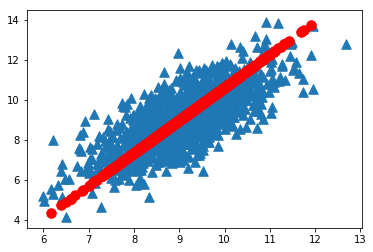

In [18]:
# 使用matplotlib绘图
dataMat = loadDataSet('testSet.txt')
lowDMat, reconMat = pca(dataMat, 1)
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
#三角形表示原始数据点
ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],\
                    marker='^',s=90)
#圆形点表示第一主成分点，点颜色为红色
ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],\
           marker='o',s=90,c='red')
plt.show()